In [1]:
import copy
import numpy as np
import pandas as pd

from src.common.functions import get_feature_importance
%cd /home/heza7322/PycharmProjects/missing-value-handling-in-carts
#%cd /Users/Henning/PycharmProjects/missing-value-handling-in-carts
import matplotlib.pyplot as plt
from src.binary_tree import BinaryTree
from src.trinary_tree import TrinaryTree
from src.weighted_tree import WeightedTree
from src.common.functions import get_indices, calculate_loss, fit_response

/home/heza7322/PycharmProjects/missing-value-handling-in-carts


In [9]:
idx = pd.IndexSlice

In [40]:
data_folder = 'example_notebooks/data_results'
data_sets = ['auto_mpg','balance_scale','black_friday','boston_housing','cement','iris','kr_vs_kp',
             'lymphography','titanic','wine_quality']

tree_types = ['majority','mia','trinary','weighted']
missingnesses = ['all','test']
missing_probs = [0,0.25,0.5,0.75]

index = pd.MultiIndex.from_product([data_sets,missingnesses,tree_types],names = ['data_set','missingness','tree_type'])
results = pd.DataFrame(index = index, columns = missing_probs)

for data_set in data_sets:
    df = pd.read_csv(f'{data_folder}/results_{data_set}.csv', index_col = 0)
    df = df/df.loc[0]
    results.loc[idx[data_set,'all']] = df.T.values

    df_test = pd.read_csv(f'{data_folder}/results_test_{data_set}.csv', index_col = 0)
    df_test = df_test/df_test.loc[0]
    results.loc[idx[data_set,'test']] = df_test.T.values

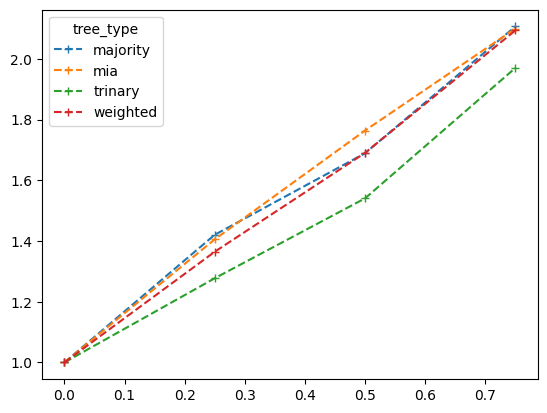

In [52]:
results_avg = results.groupby(['missingness','tree_type']).mean()
results_avg.loc['all'].T.plot(marker='+',linestyle='--');

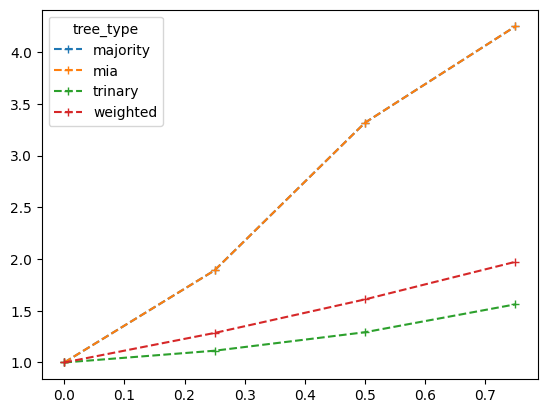

In [53]:
results_avg.loc['test'].T.plot(marker='+',linestyle='--');